# Exercise: Analyzing Poker Hand Outcomes

Let's explore a question: how can we best visualize the likely outcomes of a poker hand given that we haven't been dealt all the cards yet? In this case, we start with a set of cards and then deal out the remaining 7 cards to complete the hand and determine the highest rank of each hand that results. Let's create a function that plots the counts of each set of resulting hands by rank so that we can compare each partial hand's strategic value. This could be very useful in terms of determining how likely a winning hand was from a particular staring point.

Let's familiarize ourselves with the data. Our virtual deck of cards consists of cards with 13 possible values: 2,3,4,5,6,7,8,9,0,J,Q,K,A. Here 0 represents the value 10, and Jack, Queen, King, and Ace are represented as J,Q,K, and A, respectively. The four possible suits are represented as s (spades), c (clubs), d, diamonds, and h (hearts). The number of starting cards in the hands could vary (we may have been dealt 1 card, 2 cards, 3 cards, etc.), but the full hand consists of 7 cards. After being dealt, each hand is evaluated for the highest hand rank it contains ranging from the lowest (high card) to the highest (straight flush).

**(1)** Begin by loading and viewing the raw data which you can find in the file "poker_results.csv". You'll notice that this is essentially the content of a histogram of sorts where instead of bins with ranges of values, we have hand ranks.

In [1]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

poker = pd.read_csv("data/poker_results.csv")  # We'll only use the first 9 entries for this exercise
poker

,Cards,high card,pair,two pair,three of a kind,straight,flush,full house,four of a kind,straight flush
0,As Ks Qs Js,861,2125,946,166,1103,4115,58,2,624
1,8s 8c 7c 6s,0,3451,3856,767,1117,214,562,28,5
2,As Jh 0d 8c,2321,4654,1578,238,1141,0,67,1,0
3,As Ah Ks Kh,0,0,7440,0,32,199,2274,54,1
4,As Kh Qs Jc,2053,3757,1479,242,2311,87,71,0,0
5,8s 8c 7c 6c,0,3079,3529,731,1019,985,551,26,80
6,8s 8c 8d,0,0,0,5854,74,72,3191,809,0
7,2h 7c 3d,2339,4718,2028,412,294,69,130,9,1
8,Ah,1781,4410,2390,503,345,311,241,16,3


**(2)** Next, create a function to plot a single row of the above dataset as a histogram. This plot should take as inputs the Axes object on which to plot the histogram, the counts for the highest rank for each starting hand (which is provided in the data), and the names of each of the hands, `hist_rank(ax, counts, hand_names)`

You may need to rotate your x tick labels to be able to read them clearly. This can be done using the `ax.set_xticklabels(ax.get_xticklabels(), rotation=90)` construction assuming that `ax` represents the Axes object you're plotting on.

In [2]:
def hist_rank(ax, counts, labels):
    x = np.arange(0, len(counts))  # This creates dummy x values to plot alongside the counts so the values are evenly spaced across the x axis
    ax.bar(x, counts, tick_label=labels)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # This rotates the labels vertically so they can be read more easily

**(3)** Test out your function on our data. To do this, choose the 'Ah' (ace of hearts) partial starting hand and plot the histogram of the highest ranks resulting from that ace of hearts with the function you just created. Make sure to label your x- and y-axis labels and set the title of your plot to be the partial starting hand ('Ah').

Text(0.5, 1.0, 'Ah')

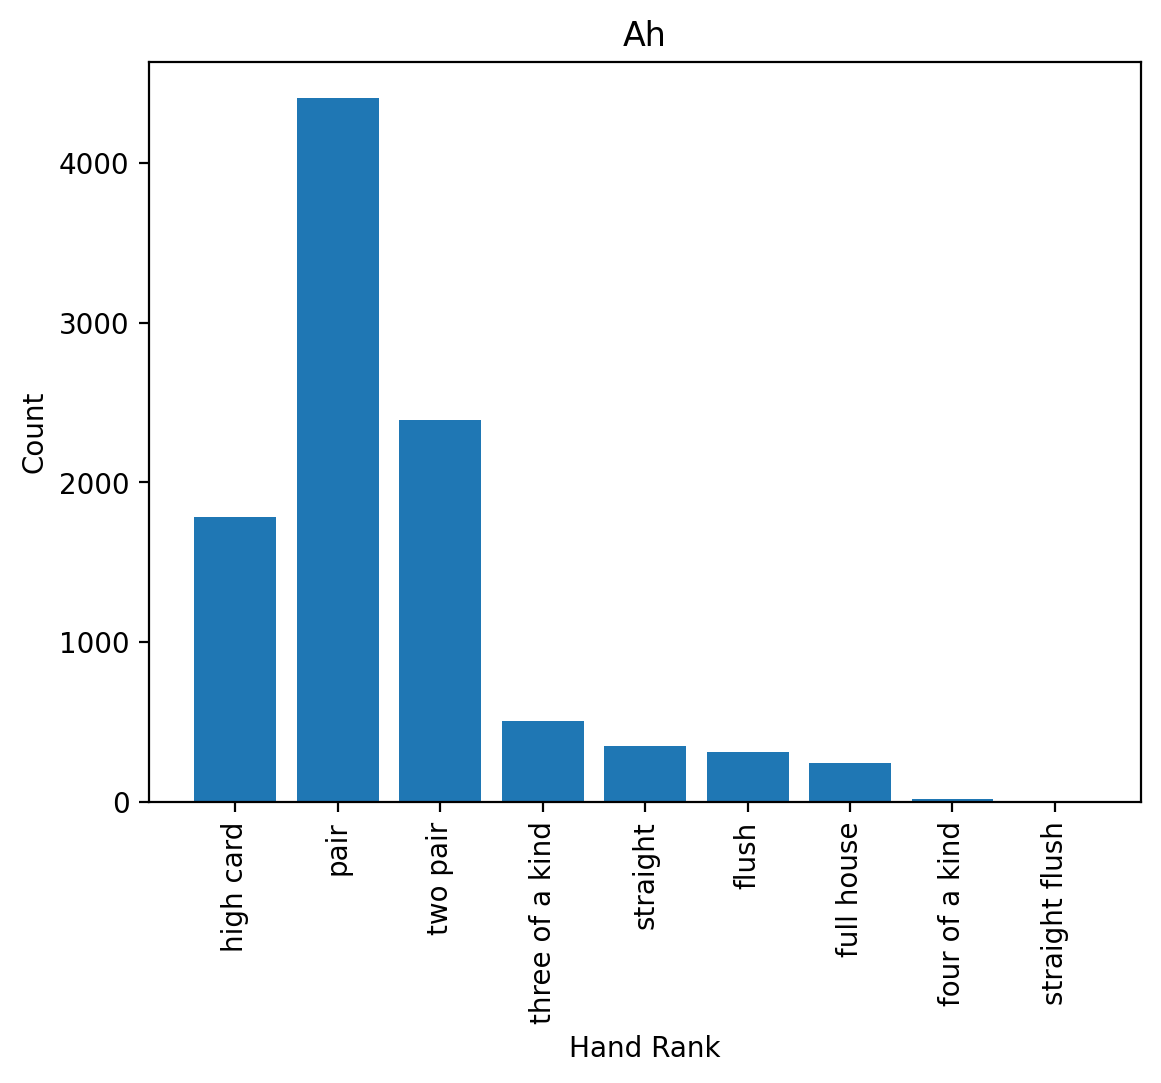

In [3]:
fig, ax = plt.subplots()

starting_hand = "Ah"
count_series = poker.loc[poker["Cards"] == starting_hand]  # Extract the row corresponding to the starting hand
count_series = count_series.drop(columns=["Cards"])  # Remove the "Cards" column since it's not relevant
counts = count_series.values[0]  # Extract the count array
labels = count_series.columns  # Extract the labels as an array

hist_rank(ax, counts, labels)
ax.set_xlabel("Hand Rank")
ax.set_ylabel("Count")
ax.set_title(starting_hand)

**(4)** Take a look at the resulting distribution of outcomes. Verify that your plot is working correctly given the raw data.

**(5)** Looking at the data, how likely is a high ranking hand (three of a kind or better) starting with the ace of hearts?

**(6)** Now, let's compare all of the starting hands that we have to see how they shake out to see if there are any trends that can be seen across the different sets of starting cards. To do this, construct a 3-by-3 subplot matrix of histograms, one for each set of starting cards, titling each with the starting cards themselves. Note: if your plots overlap one another adjust the `figsize` property of `subplots`; we recommend 10 inches wide by 8 inches tall. And if you're finding there's overlap between the figures, try `fig.tight_layout()`, which is generally a good idea to use at the end of most subplot plots since it makes the most of available space without overlapping plot components.

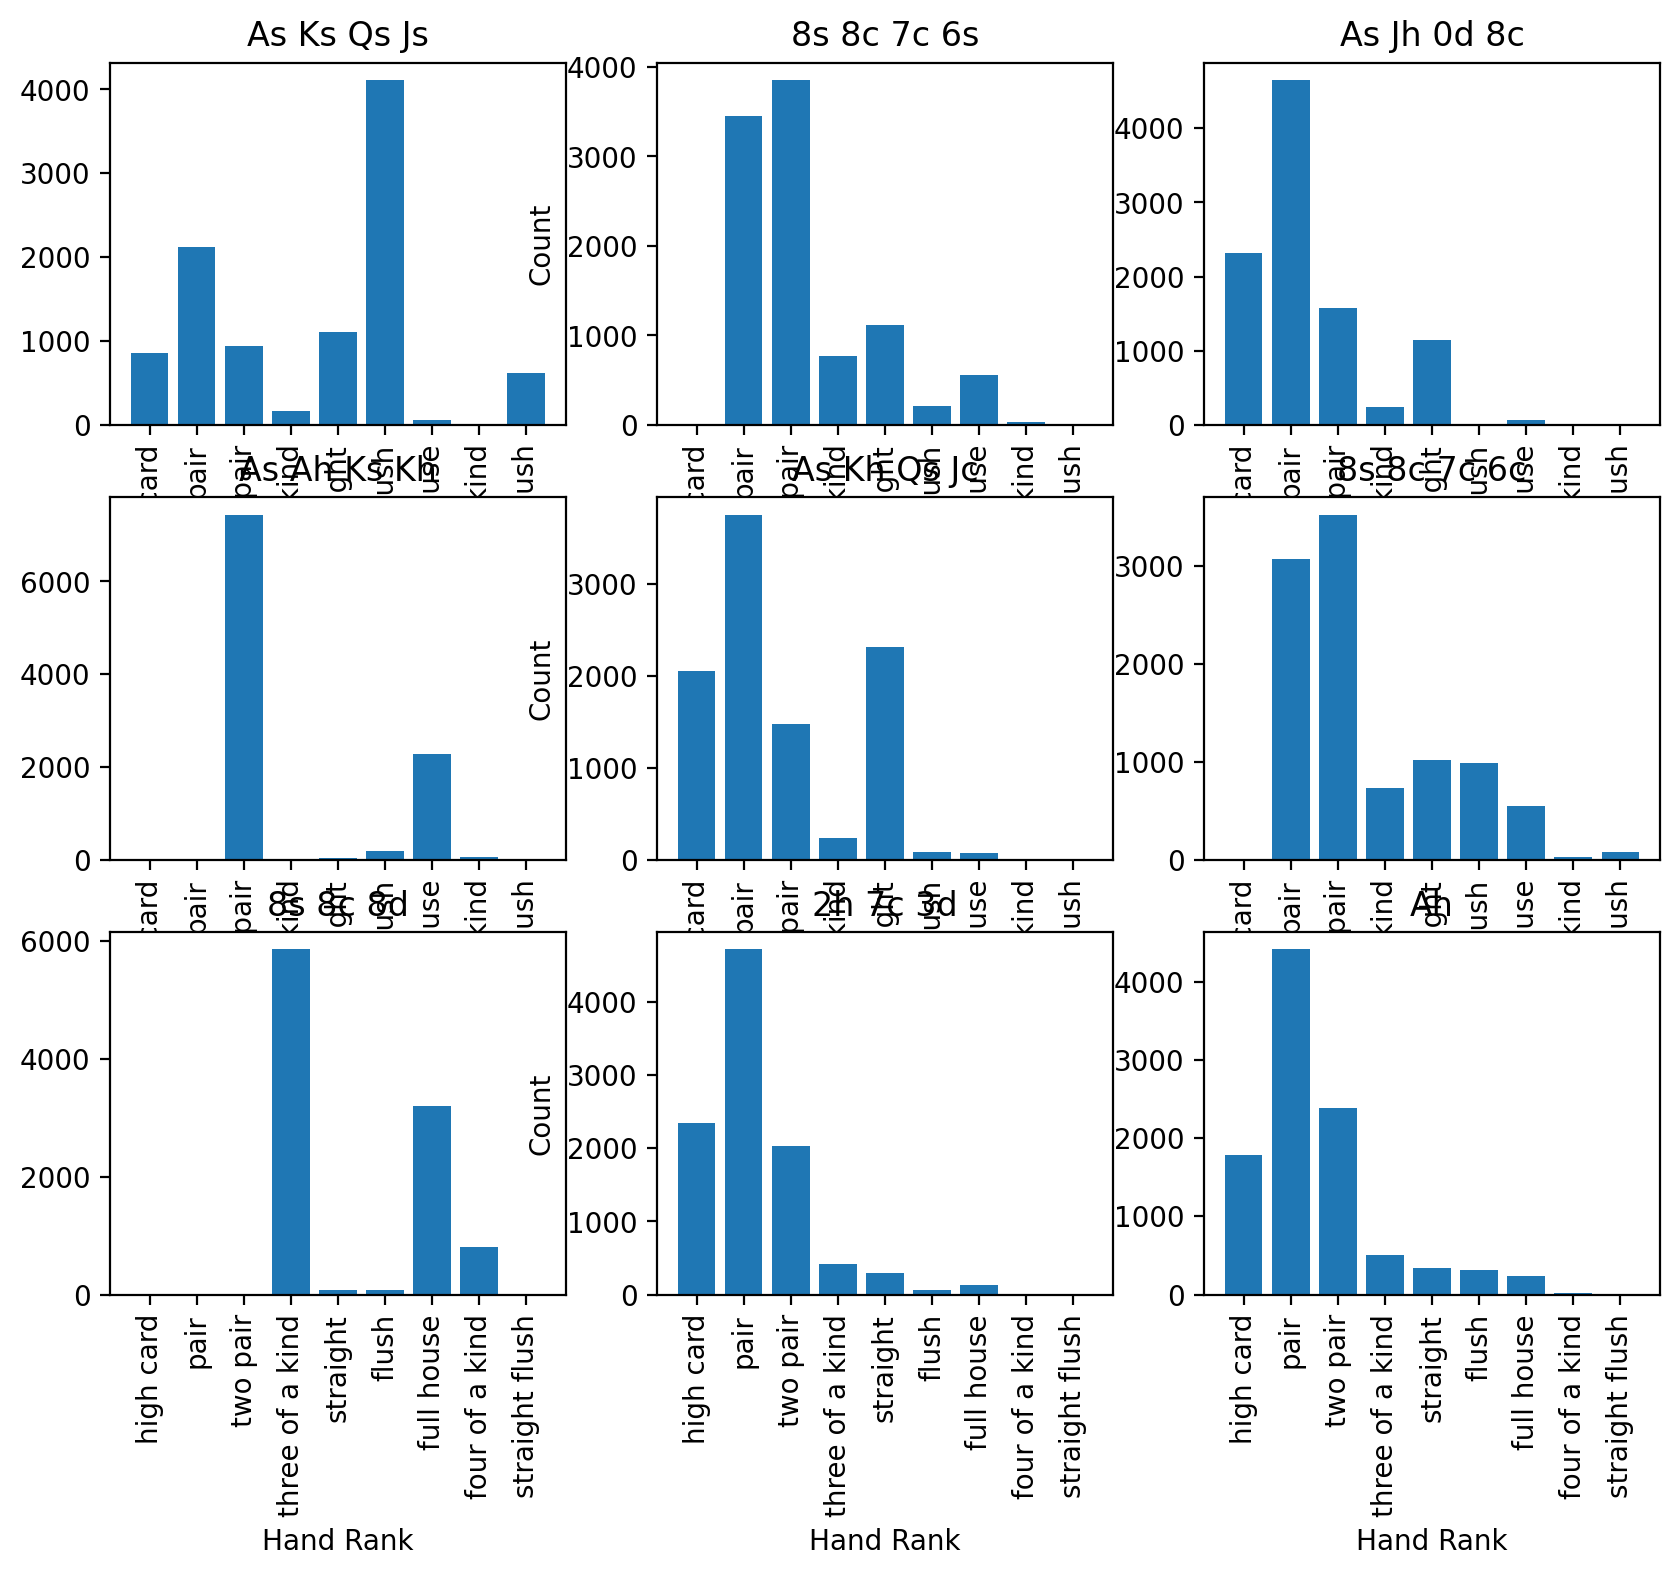

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8) )

for i, ax in enumerate(axs.flatten()):
    result_series = poker.iloc[i]
    starting_hand = result_series["Cards"]
    count_series = result_series.drop(index=["Cards"])
    counts = count_series.values
    labels = count_series.index

    hist_rank(ax, counts, labels)
    ax.set_title(starting_hand)

# Add axis labels to ONLY the left-most axes for the y-label and bottom-most for the x-label to keep the plot easier to read
for ax in axs[:, 1]:
    ax.set_ylabel("Count")
for ax in axs[-1, :]:
    ax.set_xlabel("Hand Rank")

fig.tight_layout()

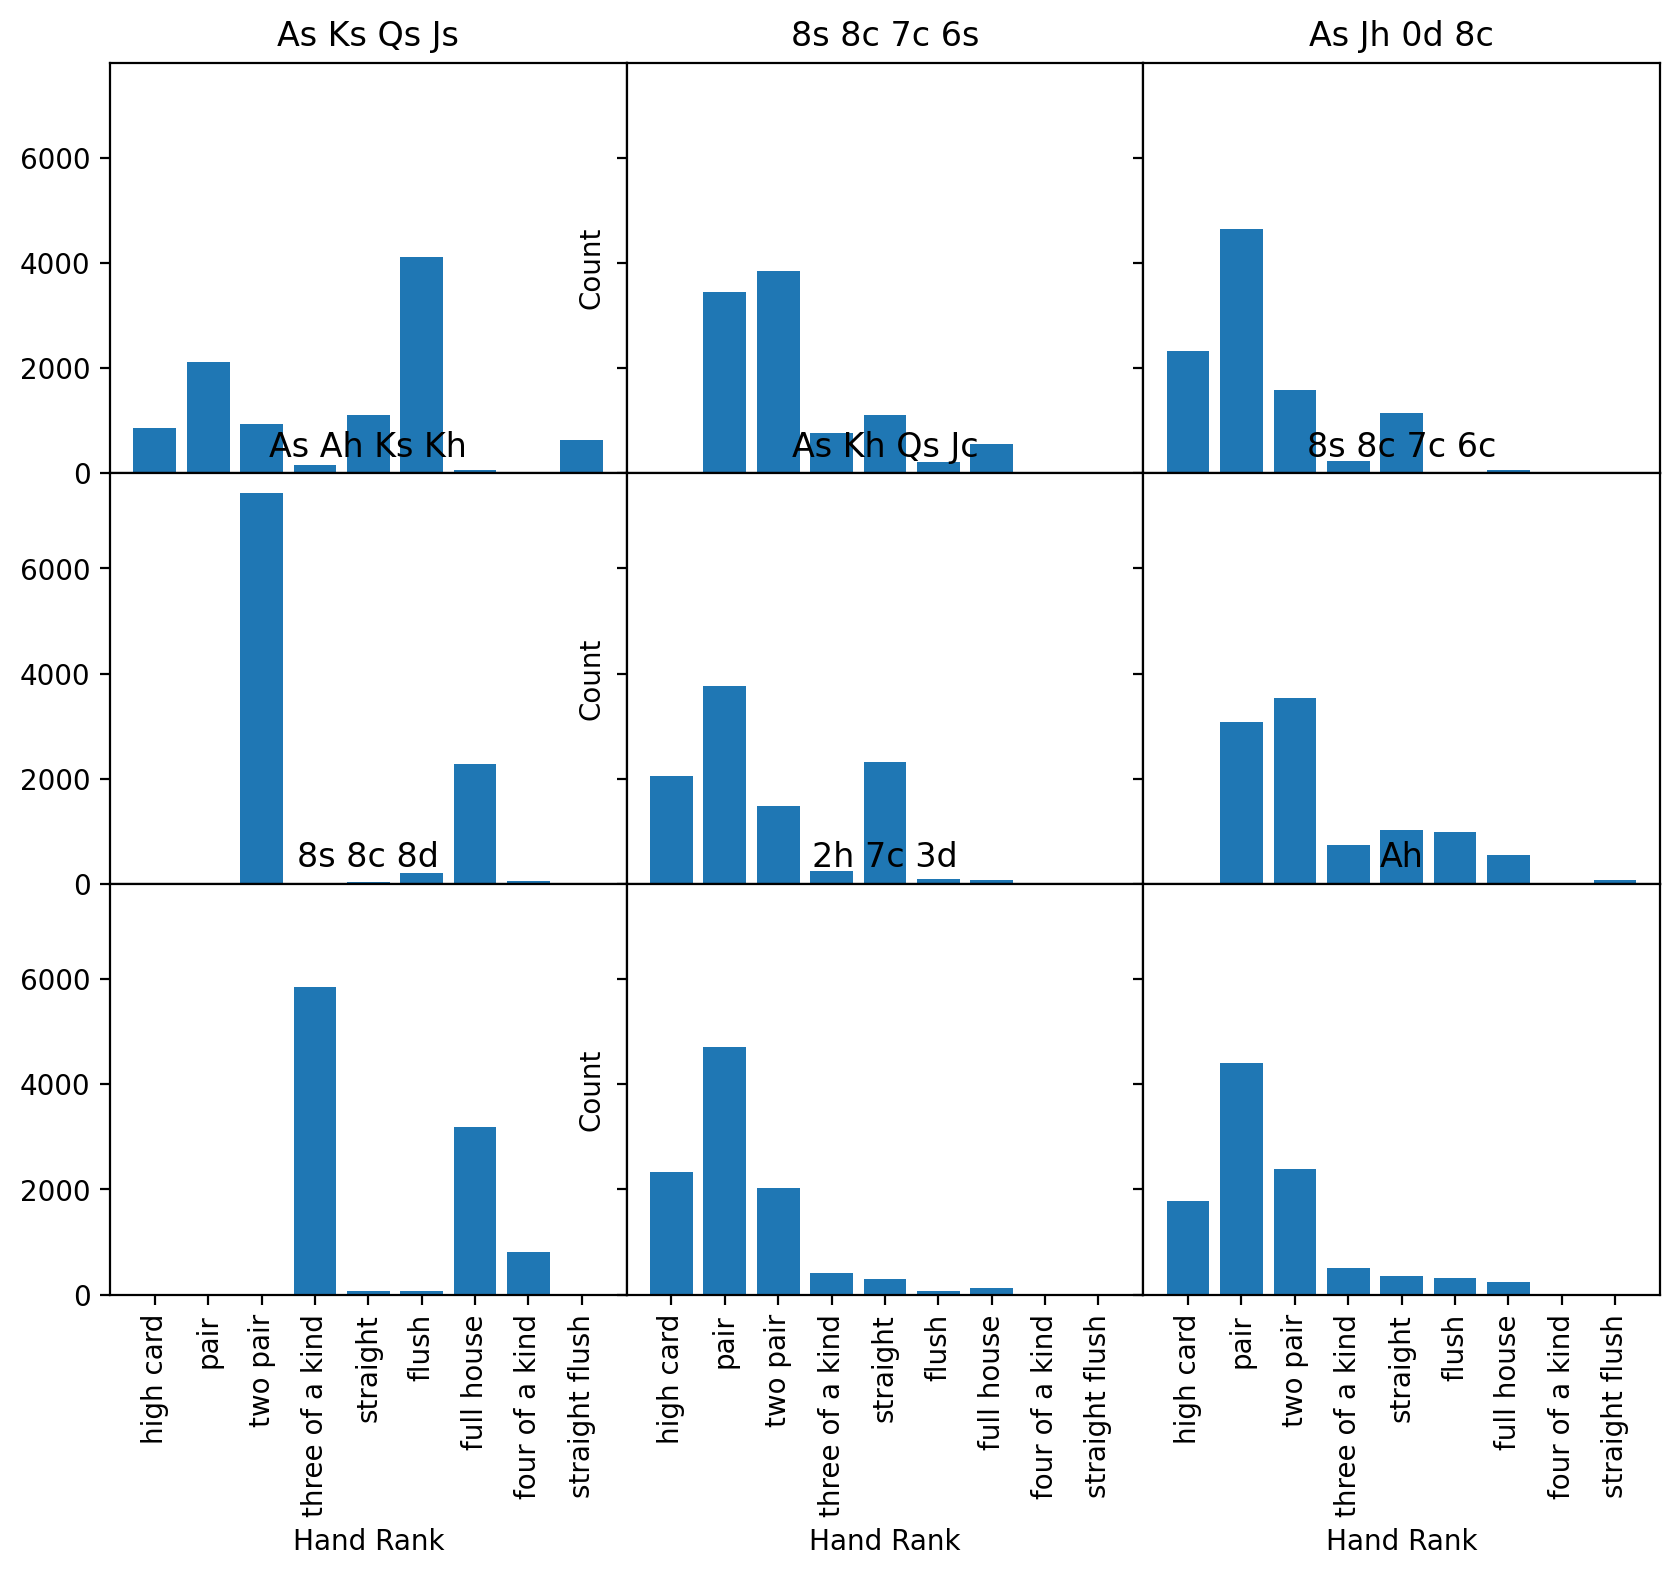

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8), sharex=True, sharey=True)  # The sharex and sharey keyword parameters force the axes to have the same extent

for i, ax in enumerate(axs.flatten()):
    result_series = poker.iloc[i]
    starting_hand = result_series["Cards"]
    count_series = result_series.drop(index=["Cards"])
    counts = count_series.values
    labels = count_series.index

    hist_rank(ax, counts, labels)
    ax.set_title(starting_hand)

fig.subplots_adjust(hspace=0, wspace=0)  # Removes the space between the subplots

# Add axis labels to ONLY the left-most axes for the y-label and bottom-most for the x-label to keep the plot easier to read
for ax in axs[:, 1]:
    ax.set_ylabel("Count")
for ax in axs[-1, :]:
    ax.set_xlabel("Hand Rank")

**(7)** Now, lets make some tweaks to this plot to make it more professional and easier to read. The current plot, with so many redundant x tick labels is very hard to read, but we can fix this:

1. Set the x and y axis limits to be the same for all subplots (while there are a couple of ways of doing this, one way is to use the sharex and sharey keyword parameters for `subplots`)
2. Remove the space between subplots to waste less space. You can do this with the `ax.subplots_adjust()` method.
3. Add axis labels to ONLY the left-most axes for the y-label and bottom-most for the x-label to keep the plot easier to read
4. The titles probably overlap with other content. Instead of using a title, add text to the upper right of the plot with the hand.

The type of plot above is called a small multiple, where the axes are the same for all the plots allowing for easier direct comparison across each of the plots and are very helpful for visualizing data with shared properties.

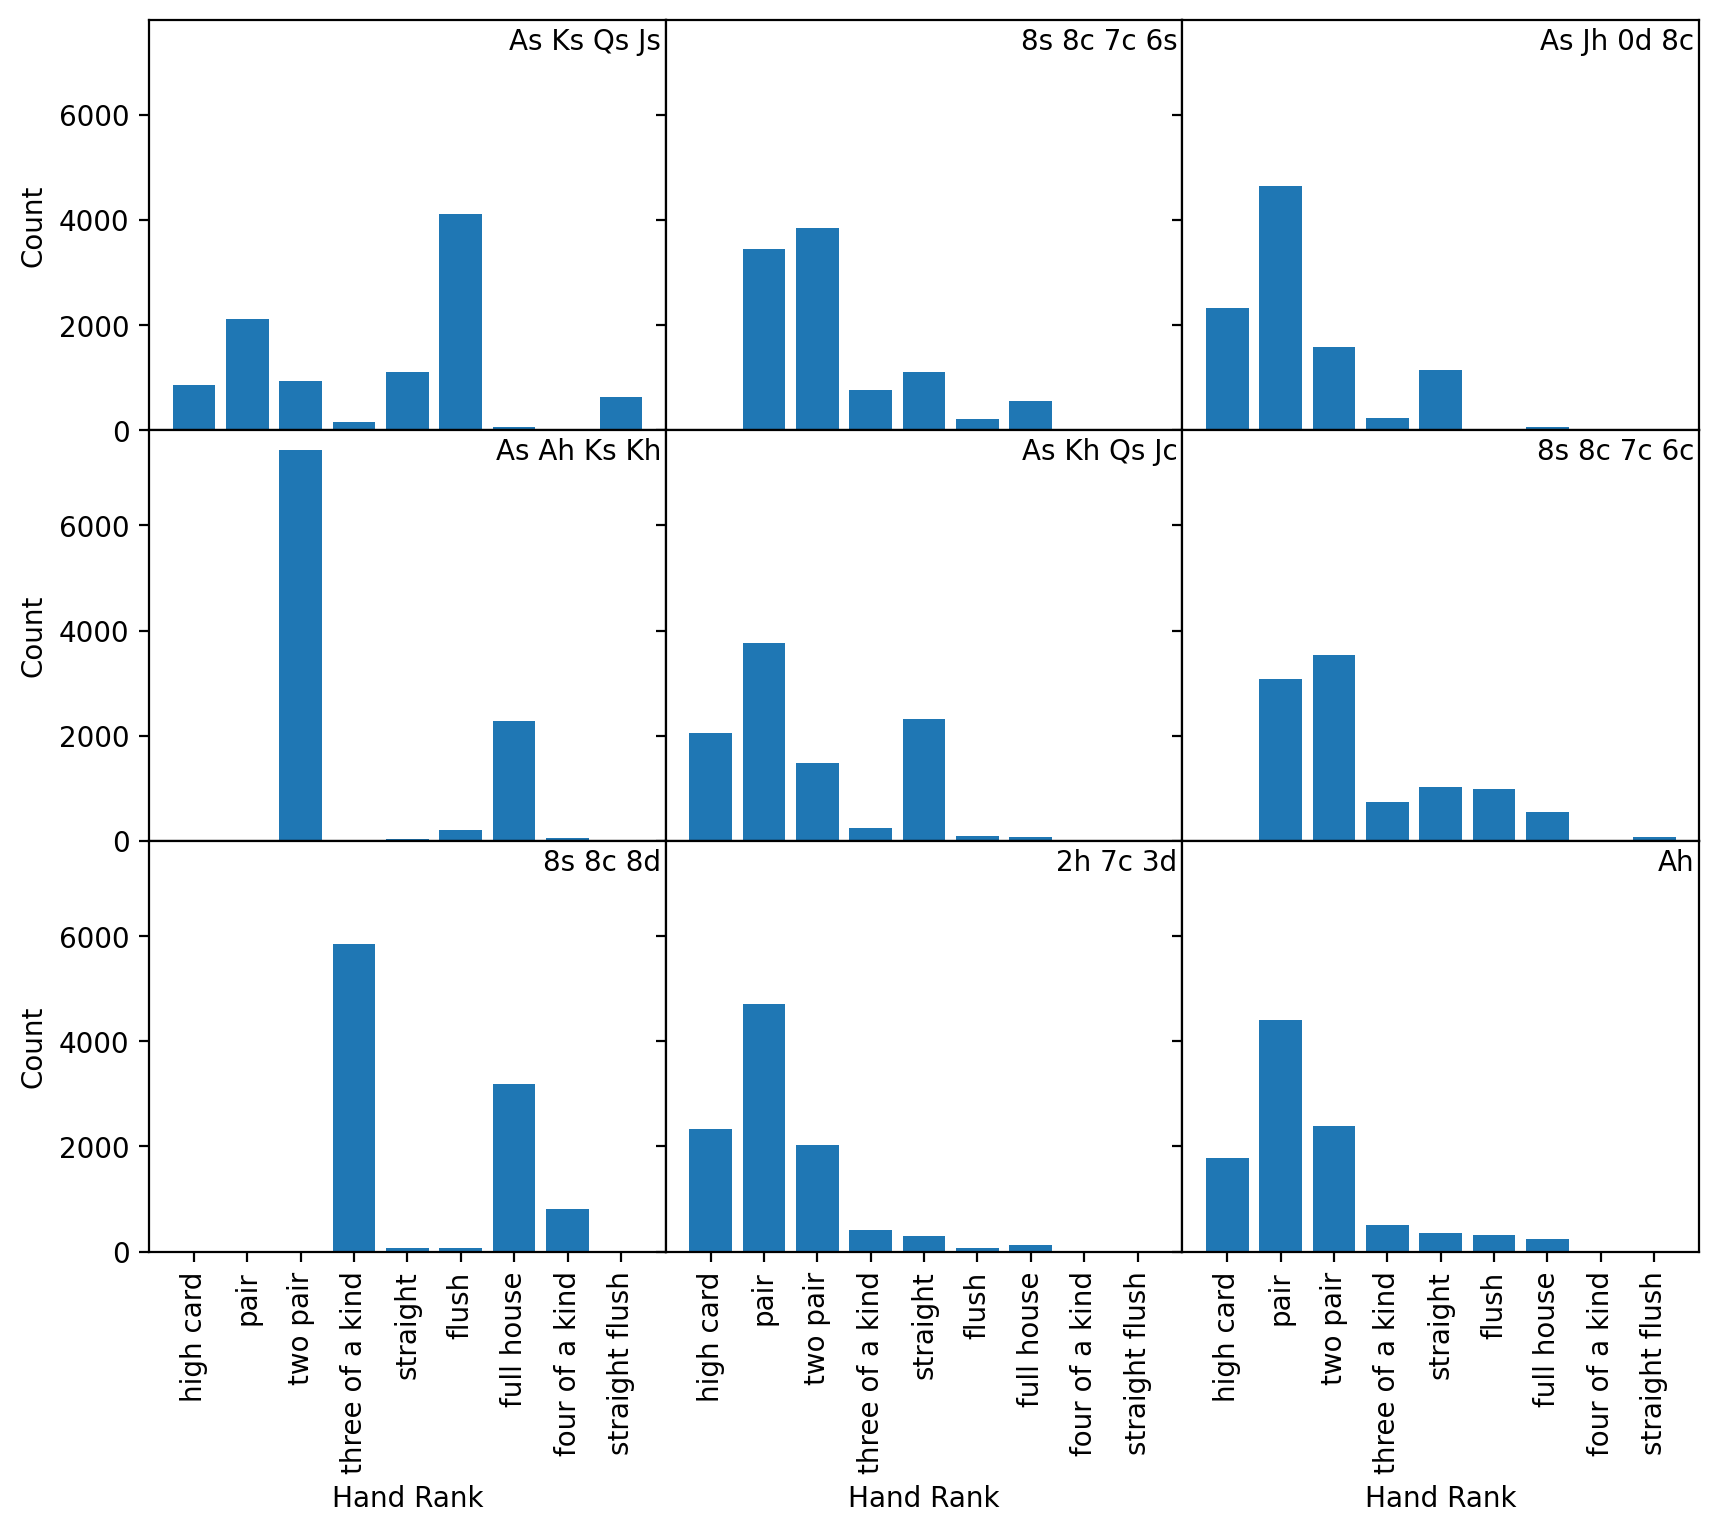

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten()):
    result_series = poker.iloc[i]
    starting_hand = result_series["Cards"]
    count_series = result_series.drop(index=["Cards"])
    counts = count_series.values
    labels = count_series.index

    hist_rank(ax, counts, labels)
    # Place text on each plot in at a location the units of the axes of the plot
    # (in this case, the upper-right corner is 8.75, 7250 since there are
    # 9 elements so 8.75 goes near the end of the x axis and 7250 since the max values is about 7500.
    ax.text(8.75, 7250, starting_hand, horizontalalignment="right")

fig.subplots_adjust(hspace=0, wspace=0)

# Add axis labels to ONLY the left-most axes for the y-label and bottom-most for the x-label
for ax in axs[:, 0]:
    ax.set_ylabel("Count")
for ax in axs[-1, :]:
    ax.set_xlabel("Hand Rank")

**(8)** Compare how starting with each subset of cards affects possible hand ranks with all seven cards. Which starting subsets appear to be the most advantageous? Which seems to be the least advantageous?